# **Data Imbalance**

Data imbalance refers to datasets where the distribution of observations in the target class is uneven, meaning one class label has a significantly higher number of observations than the other. This situation can lead to challenges in machine learning, as models may become biased towards the majority class, resulting in poor performance on the minority class. For example, in a binary classification problem, if 90% of the data belongs to one class and only 10% to another, the dataset is considered imbalanced.

**Problem with Handling Imbalanced Data for Classification**

- Algorithms may get biased towards the majority class and thus tend to predict output as the majority class.
- Minority class observations look like noise to the model and are ignored by the model.
- Imbalanced dataset gives misleading accuracy score.

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
data.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.Class.value_counts()

,count
Class,
0,284315
1,492


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('Class',axis=1),data['Class'],test_size=0.2,random_state=0)

In [ ]:
y_train[:2]

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr = DecisionTreeClassifier()
lr.fit(X_train,y_train)
pred1 = lr.predict(X_test)
print(confusion_matrix(y_test,pred1))
print(classification_report(y_test,pred1))

[[56834    27]
 [   21    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.75      0.79      0.77       101

    accuracy                           1.00     56962
   macro avg       0.87      0.90      0.88     56962
weighted avg       1.00      1.00      1.00     56962



**Now handle the Imbalance data**

In [8]:
# class count
class_count_0, class_count_1 = data['Class'].value_counts()
class_count_0,class_count_1

(284315, 492)

In [9]:
# Separate class
class_0 = data[data['Class'] == 0]
class_1 = data[data['Class'] == 1]# print the shape of the class
display(class_0[:2],class_1[:2])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.0,1


In [10]:
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (284315, 31)
class 1: (492, 31)


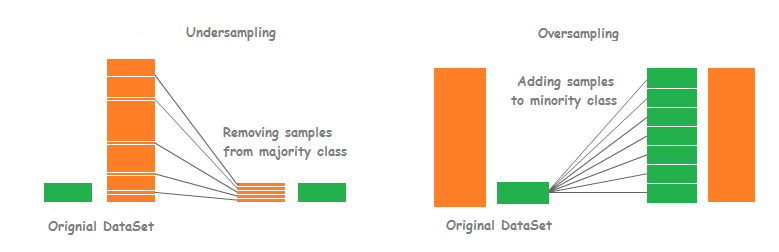

### **1. Random Under-Sampling**
- Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

In [14]:
display(class_count_0,class_count_1)

284315

492

total class of 1 and 0: Class
0    492
1    492
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

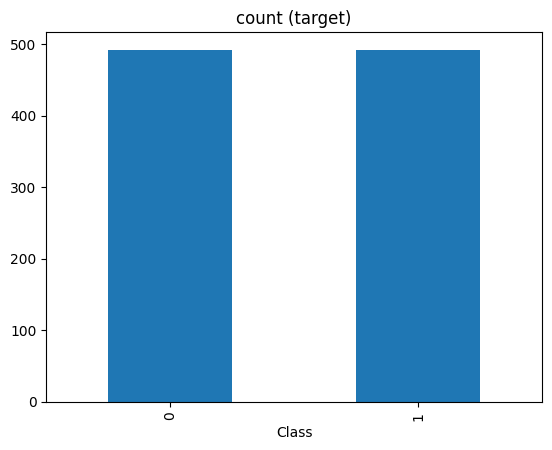

In [15]:
class_0_under = class_0.sample(class_count_1)   # select 492 random records from class 0 (majority class)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:",test_under['Class'].value_counts())# plot the count after under-sampeling
test_under['Class'].value_counts().plot(kind='bar', title='count (target)')

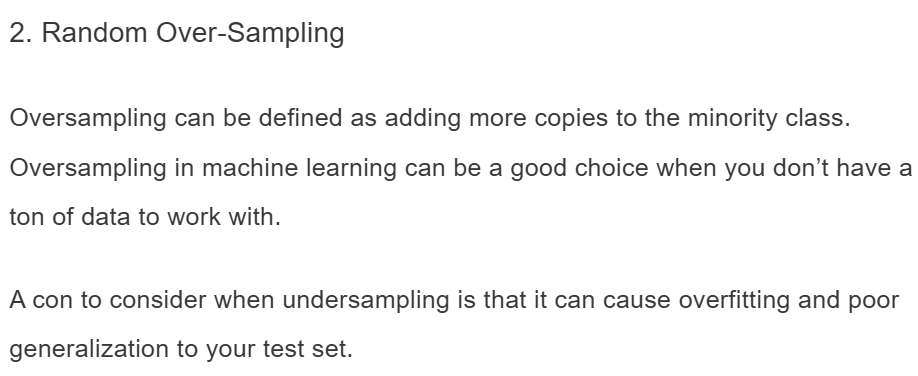

In [ ]:
class_0.shape  #majority class

In [ ]:
demo = pd.DataFrame([10,20,30])
demo

In [ ]:
demo.sample(10,replace=True).value_counts()

Class 1: 284315
total class of 1 and 0: Class
1    284315
0    284315
Name: count, dtype: int64


<Axes: title={'center': 'count (target)'}, xlabel='Class'>

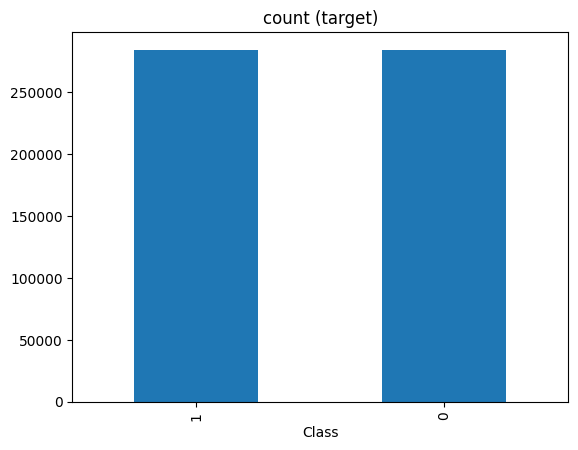

In [16]:
class_1_over = class_1.sample(class_count_0, replace=True)
print('Class 1:',class_1_over.shape[0])

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

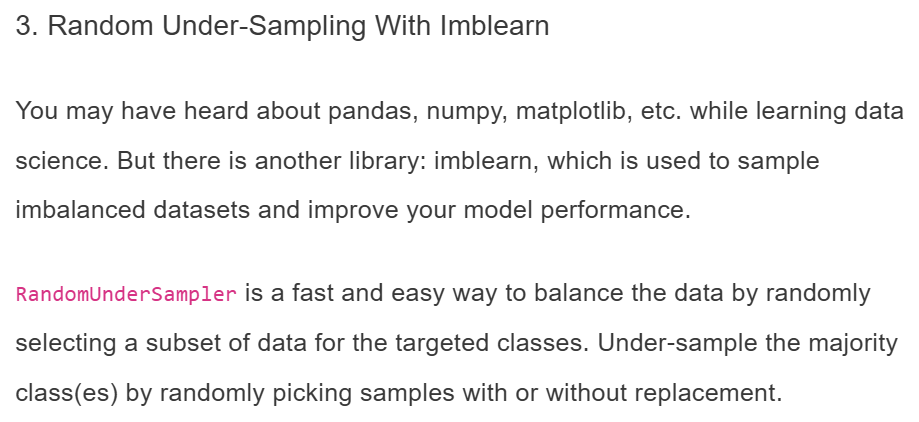

In [17]:
# check NaN values present
data.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [4]:
# prepare x,y
x = data.drop(['Class'], axis=1)
y = data['Class']

In [19]:
x[:2]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69


In [20]:
y[:2]

,Class
0,0
1,0


In [21]:
y.value_counts()

,count
Class,
0,284315
1,492


In [22]:
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(x, y)

print('original dataset shape:',Counter(y)) # o
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 492, 1: 492})


In [23]:
y_rus.value_counts()

,count
Class,
0,492
1,492


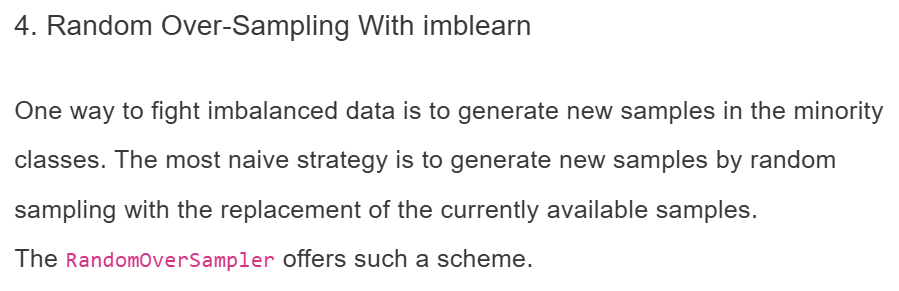

In [24]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [25]:
sum(x_ros.duplicated())

284904

In [ ]:
x.shape

In [ ]:
x_ros.shape

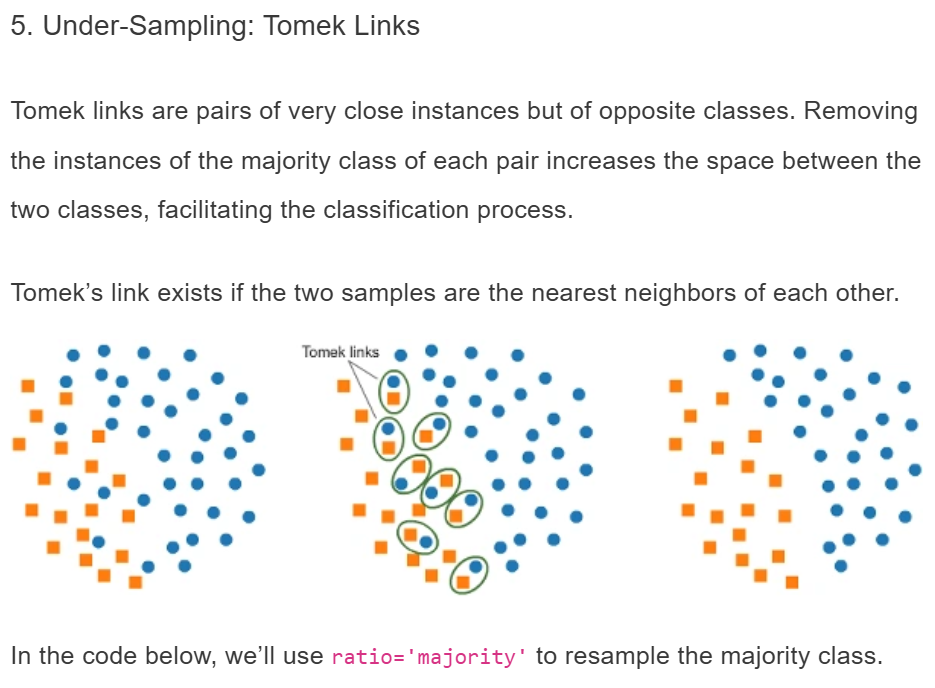

In [ ]:
# import library
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='not majority')

# fit predictor and target variable
x_tl, y_tl = tl.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_tl))

https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc/

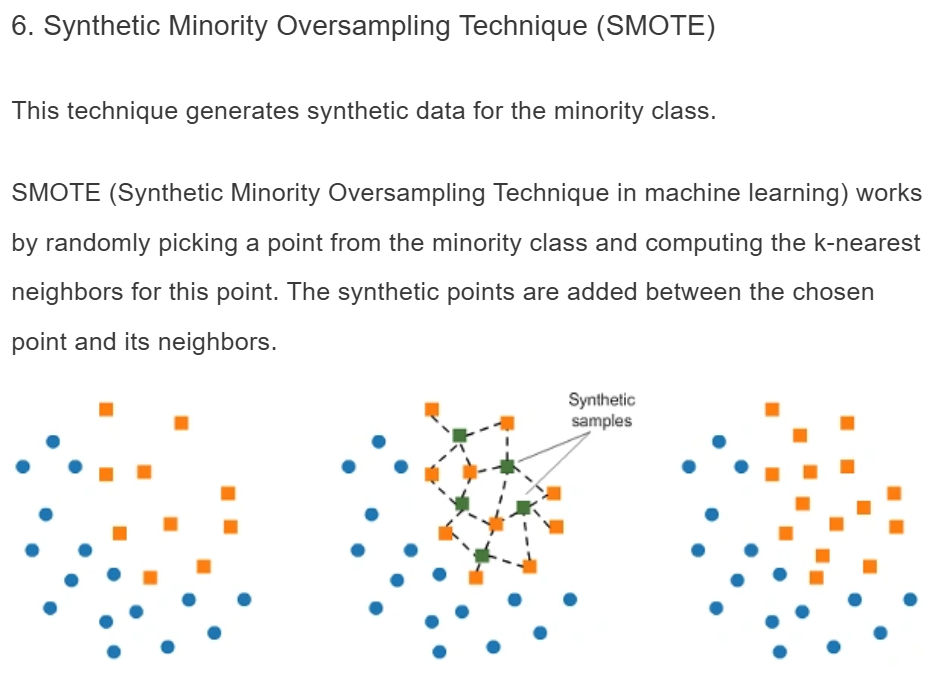

In [5]:
# import library
from collections import Counter
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 284315, 1: 492})
Resample dataset shape Counter({0: 284315, 1: 284315})


In [6]:
x_smote.duplicated().sum()

np.int64(8466)

# **Important Takeaways**

- Some of the most widely used techniques are SMOTE, imblearn oversampling, and under sampling.
- There is no “best“ method for handling imbalance, it depends on your use case.

https://www.analyticsvidhya.com/articles/class-imbalance-in-machine-learning/


Tomek: https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc/